# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>


### <span style="color:darkred">Descritores de sinais</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Conteúdo:__
1. Características temporais / sequenciais
2. Características em frequência

***


## <font color="blue">Características temporais</font>
Características extraídas com relação ao domínio original do sinal, dos pontos amostrados em sequência (comumente temporal).

Todo o sinal então pode ser **descrito** por meio dessas características computadas.

Assim ao invés de utilizar a representação original, por meio de pontos amostrados sequencialmente, utilizo uma variável que *descreve* o conteúdo.

Veremos as seguintes características:


| Característica |  (em inglês) |	Descrição |
|:--- |:--- |:--- |
| Cruzamentos por zero | Zero Crossing Rate |	A taxa de mudanças de sinal (positivo/negativo) com a qual os dados mudam durante uma certa janela observada. |
| 	Energia 	| Energy | A soma dos quadrados das amplitudes normalizada pelo tamanho da janela. |
|   Entropia da energia | 	Entropy of energy | A entropia das energias normalizadas de janelas. Uma medida relacionada a mudanças abruptas. |
|  Momentos estatísticos | 	Statistical moments | Cálculo de momentos estatísticos do sinal global ou de forma local. |

In [3]:
import numpy as np
import matplotlib.pyplot as plt


Para estudar características temporais, vamos simular 3 sinais

In [30]:
np.shape(f_sin)

(400,)

Text(0.5, 1.0, 'Pontos: 400')

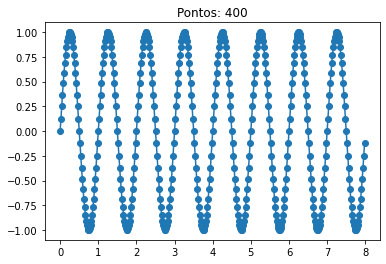

In [24]:
# define amostragem ao longo do tempo
F = 50
# define os segundos
secs = 8
# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

# computa a funcao
f_sin = np.sin(t * 2 * np.pi)

plt.plot(t, f_sin, 'o-')
plt.title("Pontos: %d" % t.shape)

Text(0.5, 1.0, 'Pontos: 600')

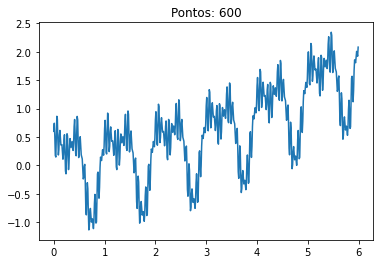

In [5]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 6

# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

# computa a funcao
f_1 = 0.2*np.sin(t*2*np.pi*20) + 0.2*np.cos(t*2*np.pi*15) + 0.4*np.cos(t * 2 * np.pi*2) + 0.6*np.sin(t * 2 * np.pi) + 0.05*t**2 

plt.plot(t, f_1)
plt.title("Pontos: %d" % t.shape)


Text(0.5, 1.0, 'Pontos: 240')

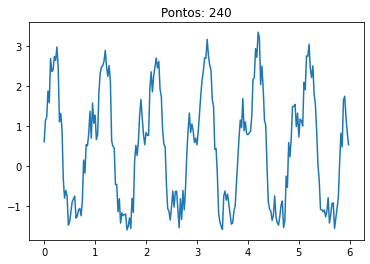

In [6]:
# define amostragem ao longo do tempo
F = 40
# define os segundos
secs = 6
# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

f_2 = 1.6*(np.sin(t*2*np.pi)**3)+1.3*np.cos(t*2*np.pi)-.5*np.cos(2*t*2*np.pi)-.3*np.cos(3*t*2*np.pi)-0.1*np.cos(4*t*2*np.pi)
f_2 = f_2 + np.random.rand(f_2.shape[0])*1

plt.plot(t, f_2)
plt.title("Pontos: %d" % f_2.shape)


In [7]:
def taxa_cruzamentos_por_zero(sinal):
    '''Cruzamentos por zero em um intervalo de tempo '''
    M = len(sinal)
    cont_zero = np.sum(np.abs(np.diff(np.sign(sinal)))) / 2
    return np.float64(cont_zero) / np.float64(M - 1.0)

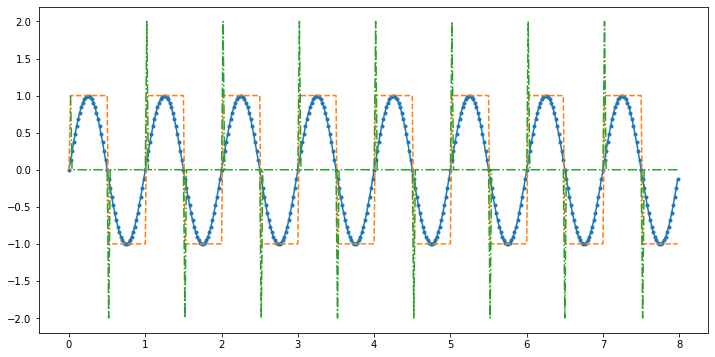

In [8]:
# exemplifica usando funcao Seno
F = 50
secs = 8
t = np.arange(0, secs, (1/F))

plt.figure(figsize=(12,6))
plt.plot(t, f_sin, '.-')
plt.plot(t, np.sign(f_sin), '--')
plt.plot(t[1:], np.diff(np.sign(f_sin)), '-.')

In [9]:
print("Seno = ", taxa_cruzamentos_por_zero(f_sin))
print("F1 = ", taxa_cruzamentos_por_zero(f_1))
print("F2 = ", taxa_cruzamentos_por_zero(f_2))

Seno =  0.03884711779448621
F1 =  0.05008347245409015
F2 =  0.058577405857740586


In [10]:
def energia(sinal):
    '''Energia do sinal (normalizada)'''
    return np.sum(sinal ** 2) / np.float64(len(sinal))

In [11]:
print("Seno = ", energia(f_sin))
print("F1 = ", energia(f_1))
print("F2 = ", energia(f_2))

Seno =  0.5
F1 =  0.8859123670816745
F2 =  2.2061210771320323


In [12]:
def entropia_energia(sinal, n_blocos=10):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

In [13]:
print("Seno = ", entropia_energia(f_sin))
print("F1 = ", entropia_energia(f_1))
print("F2 = ", entropia_energia(f_2))

Seno =  3.307447020274472
F1 =  2.856682723215566
F2 =  3.2394596701513154


In [14]:
def momentos_estatisticos(sinal, n_blocos=1):
    '''Calcula quatro momentos estatísticos
       Parâmetros
           n_blocos: número de blocos para calcular 
                     momentos localmente (default = 1, global)
    '''

    # calcula janelas dentro do sinal
    M = len(sinal)
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    if (n_blocos == 1):
        janelas = sinal
    else:
        janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()

    # 4 momentos estatísticos
    m0 = np.mean(janelas, axis=0) # media
    m1 = np.std(janelas, axis=0) # desvio padrao
    m2 = np.mean((janelas-m0)**3)/(m1**(3/2)) # obliquidade
    m3 = (np.mean((janelas-m0)**4)/(m1**2))-3 # curtose
    
    return m0, m1, m2, m3

In [15]:
print("Seno = ", np.round(momentos_estatisticos(f_sin),4))
print("F1 = ", np.round(momentos_estatisticos(f_1),4))
print("F2 = ", np.round(momentos_estatisticos(f_2),4))


Seno =  [ 0.      0.7071  0.     -2.25  ]
F1 =  [ 0.5985  0.7264 -0.0651 -1.6074]
F2 =  [0.476  1.407  0.2671 0.4505]


---
## <font color="blue">Características em frequência</font>

Processar o sinal em seu domínio original tem algumas limitações.

Transformações matemáticas que **alterem a representação** dos dados podem ajudar na análise de sinais não estruturados.
* A análise de componentes principais por exemplo, altera a base dos dados produzindo um novo espaço de características.

--- 
Para sinais e imagens uma técnica amplamente utilizada é a **Transformada de Fourier**, que descreve sinais por meio de coeficientes de frequência.
* Ao invés de utilizar a representação de sinais por meio dos pontos amostrados ao longo de $x$, vamos mudar o eixo para frequências $u$.

> **Representação em frequência** : representar um sinal pela combinação de senos e cossenos em diferentes frequências

Assume que: *podemos aproximar qualquer sinal somando senos e cossenos com diferentes frequências e com diferentes amplitudes*

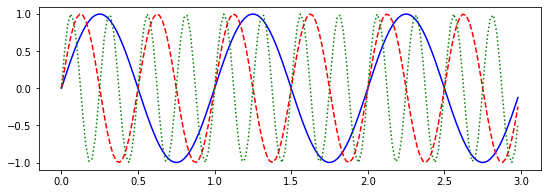

In [16]:
# define amostragem ao longo do tempo
F = 50
# define os segundos
secs = 3
# prepara o eixo real onde iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

f_sin1 = np.sin(x * (2*np.pi))
f_sin2 = np.sin(x * (2*np.pi) *2 )
f_sin4 = np.sin(x * (2*np.pi) *4 )

plt.figure(figsize=(9,3))
plt.plot(x, f_sin1, 'b-')
plt.plot(x, f_sin2, 'r--')
plt.plot(x, f_sin4, 'g:')

--- 
**Aúdio e música** podem ser bem caracterizados por diferentes frequências

* Frequências *baixas* caracterizam sons *graves* (ondas mais *lentas*)
* Frequências *altas* caracterizam sons *agudos* (ondas mais *rápidas*)

In [17]:
import IPython.display as ipd

In [18]:
FS = 22050 # define amostragem de 22KHz
secs = 1.0 # 1 segundo de áudio

# prepara audio simulado
Fr1 = 164  # primeira frequencia 164 Hz (E3)
Fr2 = 261  # segunda frequencia 261 Hz (C4)
Fr3 = 440  # segunda frequencia 440 Hz (A4)

# pesos de cada frequência
wFr1 = 1.0 
wFr2 = 0.6
wFr3 = 0.3

# montando áudio 
t = np.arange(0, secs, (1/FS))
audio = wFr1*np.sin(t*(2*np.pi) * Fr1) + \
        wFr2*np.sin(t*(2*np.pi) * Fr2) + \
        wFr3*np.sin(t*(2*np.pi) * Fr3)

# converte para 2^16 valores diferentes
audio16 = (audio * (2**15 - 1) / np.max(np.abs(audio))).astype(np.int16)

# toca áudio
ipd.Audio(audio16, rate=FS)

> **Transformada de Fourier** <font color=blue>"descobre"</font> as frequências (e coeficientes/pesos) de um sinal arbitrário

para cada frequência $u = 0..N-1$:
$$F(u) = \sum_{t=0}^{N-1} f(t) e^{-j2\pi \frac{u x}{N}}$$

Utilizamos para isso o algoritmo FFT - Fast Fourier Transform

O valor absoluto da transformada é chamado de *espectro de frequência* ou *magnitude do espectro*

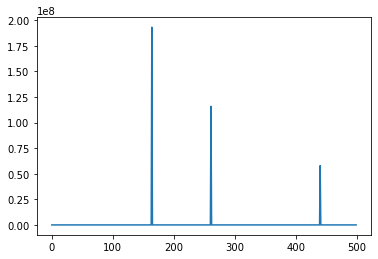

In [19]:
f_fft16 = np.fft.fft(audio16)

plt.figure()
plt.plot(np.arange(500), np.abs(f_fft16[:500]) )

| Característica |  (em inglês) |	Descrição |
|:--- |:--- |:--- |
| 	Centróide espectral | Spectral Centroid |	O centro de gravidade do espectro.  |
| 	Dispersão do espectro | Spectral Spread |	O desvio padrão do espectro do sinal. |
| 	Entropia espectral  | Spectral Entropy | Entropia das energias espectrais normalizadas, para um conjunto de sub-janelas. |

In [20]:
def centroide_dispersao_espectral(sinal, tx_amostragem):
    '''Calcula o centro de massa e dispersão do espectro do sinal'''
    
    fft_abs = np.abs( np.fft.fft(sinal) )
    N = len(fft_abs)
    
    # indices de frequencia
    ind = (np.arange(1, N+1)) * (tx_amostragem / (2.0*N))

    # calcula a distribuicao do espectro normalizando para soma unitária
    Xt = fft_abs.copy()
    Xt = Xt / Xt.max()
    NUM = np.sum(ind * Xt)
    DEN = np.sum(Xt) + 0.0001 

    # Centroide:
    centroide = (NUM / DEN)

    # Dispersão:
    dispersao = np.sqrt(np.sum(((ind - centroide) ** 2) * Xt) / DEN)

    # Normalizando:
    centroide = centroide / (tx_amostragem / 2.0)
    dispersao = dispersao / (tx_amostragem / 2.0)

    return centroide, dispersao


In [21]:
print("Seno = ", np.round(centroide_dispersao_espectral(f_sin, 50),6))
print("F1 = ", np.round(centroide_dispersao_espectral(f_1, 100),6))
print("F2 = ", np.round(centroide_dispersao_espectral(f_2, 40),6))
print("Am = ", np.round(centroide_dispersao_espectral(audio16, 22050),6))


Seno =  [0.502475 0.479988]
F1 =  [0.447326 0.436919]
F2 =  [0.471882 0.378545]
Am =  [0.500032 0.489037]


In [22]:
def entropia_espectral(sinal, n_blocos=16):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

In [23]:
print("Seno = ", entropia_espectral(f_sin))
print("F1 = ", entropia_espectral(f_1))
print("F2 = ", entropia_espectral(f_2))
print("Am = ", entropia_espectral(audio16))

Seno =  0.9997114903952453
F1 =  0.9293991318115518
F2 =  1.6256264233082491
Am =  0.9997114952291062


### Resumo:

* Sinais são dados não estruturados sequenciais
    * amostras tomadas ao longo de uma sequência
    * a taxa de amostragem é um parâmetro importante

* Descritores
    * no domínio original, ex: tempo
    * no domínio da frequência